In [2]:
from matplotlib import pyplot as plt
from matplotlib import axes
from matplotlib import pyplot
import pandas as pd
import numpy as np
import math
from scipy import stats
import csv
import statistics

from collections import Counter
from collections import defaultdict

result_path = "./KEY/"

ref = {"Creation":"CREAT",
       "Participation":"PART",
       "Connection":"CXN",
       "Other":"Other"
      }

stats=["celebrity", "professional", "amateur"]
colors1 = ["orange", "mediumseagreen", "steelblue"] # three groups
# colors2=["#6e03b1","#73BAD3","#DD364C","#ABA5A3","#469D8B"] # four styles
colors2=["C3","C4","C5","C7"] # four styles

Text(0.5, 1.0, '% of video views attracted by each group')

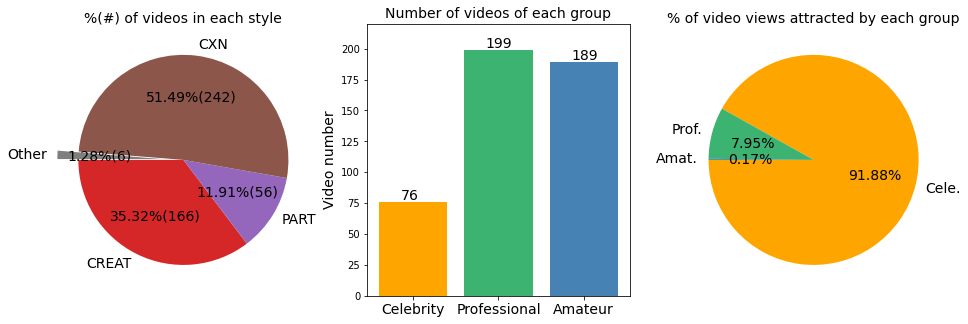

In [114]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

font_size=14
plt.figure(figsize=(16,5))

df=pd.read_csv(result_path + "final_meta_all_processed2.csv", encoding="utf-8")
plt.subplot(1,3,1)
lens=df.groupby(by=df.merged_tagging).merged_tagging.count()
lens=[lens[s] for s in ref.keys()]
explode = (0, 0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
patches, texts, autotexts=plt.pie(lens, explode=explode, labels=ref.values(), autopct=make_autopct(lens), shadow=False, startangle=180, colors=colors2)
for t in texts:
    t.set_fontsize(font_size)
for p in autotexts:
    p.set_fontsize(font_size)
plt.title("%(#) of videos in each style", fontsize=font_size)

x_ticks = ["Celebrity", "Professional", "Amateur"]
x_values=[1,2,3]
df=pd.read_csv(result_path + "FINAL_DATA.csv", encoding="utf-8")
plt.subplot(1,3,2)
lens=df.groupby(by=df.status).status.count()
lens=[lens[s] for s in stats]
plt.bar(x_values, lens, color=colors1)
plt.xticks(x_values,x_ticks,fontsize=font_size)
plt.ylim(0,220)
co=1
for l in lens:
    plt.annotate(l, xy=(co-0.15,l+2), zorder=10, fontsize=font_size)
    co+=1
plt.ylabel("Video number", fontsize=font_size)
plt.title("Number of videos of each group", fontsize=font_size)

plt.subplot(1,3,3)
views=df.groupby(by=df.status).vw_ct.sum()
views=[views[s] for s in stats]
patches, texts, autotexts=plt.pie(views, labels=["Cele.", "Prof.", "Amat."], autopct='%1.2f%%', shadow=False, startangle=180, colors=colors1)
for t in texts:
    t.set_fontsize(font_size)
for p in autotexts:
    p.set_fontsize(font_size)
plt.title("% of video views attracted by each group", fontsize=font_size)

# plt.subplot(1,4,4)
# videoc=df.groupby(by=df.channel_name).channel_name.count()
# videoc=Counter(videoc)
# plt.bar(videoc.keys(),videoc.values(),color="lightgrey")
# for t in texts:
#     t.set_fontsize(font_size)
# for p in autotexts:
#     p.set_fontsize(font_size)
# plt.title("Distribution of videos \nmade by the same YouTuber", fontsize=font_size)
# plt.ylim(0,15)
# plt.xticks(sorted(videoc.keys()))
# plt.xlabel("Number of videos made by the same YouTuber", fontsize=font_size)
# plt.ylabel("Number of YouTubers", fontsize=font_size)
# plt.annotate(videoc[1], xy=(0.55,8), zorder=10, fontsize=font_size)

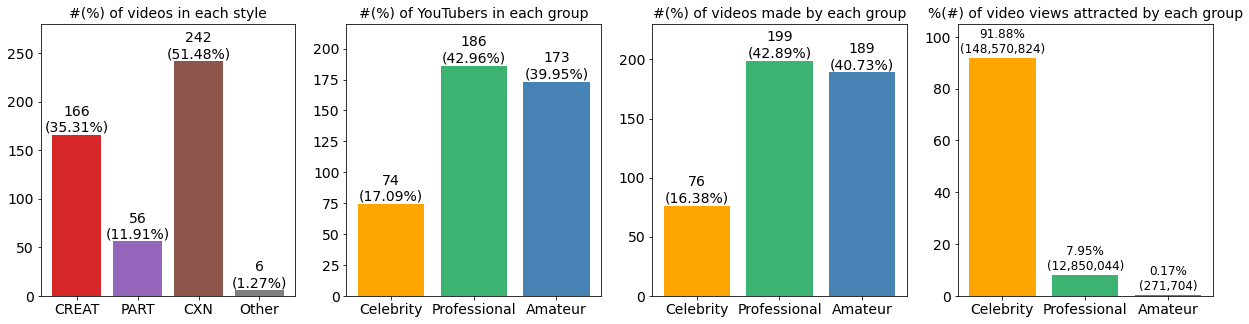

In [3]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

font_size=14
plt.figure(figsize=(21,5))

df=pd.read_csv(result_path + "final_meta_all_processed2.csv", encoding="utf-8")
plt.subplot(1,4,1)
lens=df.groupby(by=df.merged_tagging).merged_tagging.count()
lens=[lens[s] for s in ref.keys()]
x_ticks=list(ref.values())
x_values=range(1,5)
ax=plt.bar(x_values,lens, color=colors2)
plt.ylim(0,280)
plt.yticks(fontsize=font_size)
for i in range(len(lens)):
    plt.text(x_values[i], lens[i]+3,f"{lens[i]}\n({int(lens[i]/sum(lens)*10000)/100}%)", ha="center", fontsize=font_size)
plt.xticks(x_values, x_ticks, fontsize=font_size)
plt.title("#(%) of videos in each style", fontsize=font_size)

x_ticks = ["Celebrity", "Professional", "Amateur"]
x_values=[1,2,3]
plt.subplot(1,4,2)
lens=df.groupby(by=['channel_name']).aggregate({
    "channel_name":"first",
    "status":"first"
})
lens=Counter(list(lens["status"]))
lens=[lens[s] for s in stats]
plt.bar(x_values, lens, color=colors1)
plt.xticks(x_values,x_ticks,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylim(0,220)
for i in range(len(lens)):
    plt.text(x_values[i], lens[i]+3,f"{lens[i]}\n({round(lens[i]/sum(lens)*10000)/100}%)", ha="center", fontsize=font_size)
# plt.ylabel("Video number", fontsize=font_size)
plt.title("#(%) of YouTubers in each group", fontsize=font_size)

x_ticks = ["Celebrity", "Professional", "Amateur"]
x_values=[1,2,3]
df=pd.read_csv(result_path + "FINAL_DATA.csv", encoding="utf-8")
plt.subplot(1,4,3)
lens=df.groupby(by=df.status).status.count()
lens=[lens[s] for s in stats]
plt.bar(x_values, lens, color=colors1)
plt.xticks(x_values,x_ticks,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylim(0,230)
for i in range(len(lens)):
    plt.text(x_values[i], lens[i]+3,f"{lens[i]}\n({round(lens[i]/sum(lens)*10000)/100}%)", ha="center", fontsize=font_size)
# plt.ylabel("Video number", fontsize=font_size)
plt.title("#(%) of videos made by each group", fontsize=font_size)


plt.subplot(1,4,4)
views=df.groupby(by=df.status).vw_ct.sum()
views=[views[s] for s in stats]
views_percent=[v/sum(views)*100 for v in views]
plt.bar(x_values, views_percent, color=colors1)
plt.xticks(x_values, x_ticks, fontsize=font_size)
# plt.xlim(0.2,3.7)
plt.ylim(0, 105)
plt.yticks(fontsize=font_size)
for i in range(len(views)):
    plt.text(x_values[i], views_percent[i]+2,f"{round(views_percent[i]*100)/100}%\n({views[i]:,d})", ha="center", fontsize=12)
plt.title("%(#) of video views attracted by each group", fontsize=font_size)

plt.savefig(result_path + "overall.eps", bbox_inches='tight')